In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_spatial_bias_df(csv_file): 
    df = pd.read_csv(csv_file)

    # Create a new column 'has_pred_bbox' that is True if the row has a non-NaN value in the 'pred_bbox_index' column
    df['has_pred_bbox'] = ~df['pred_bbox_index'].isna()

    print(df.columns)
    # Count the number of rows with a non-NaN value in the 'pred_bbox_index' column
    num_rows_with_pred_bbox = df['has_pred_bbox'].sum()
    print(f'Number of rows with a predicted bounding box: {num_rows_with_pred_bbox}')
    
    count_by_zone = df.groupby('spatial_zone')['has_pred_bbox'].value_counts().unstack()

    # Replace NaN values in count_by_zone[True] and count_by_zone[False] with 0
    count_by_zone[True] = count_by_zone[True].fillna(0)
    count_by_zone[False] = count_by_zone[False].fillna(0)

    count_by_zone['recall'] = count_by_zone[True] / (count_by_zone[True] + count_by_zone[False])
    display(count_by_zone)

    # Plot a bar chart of the recall by spatial zone
    count_by_zone['recall'].plot(kind='bar')
    plt.title('Recall by spatial zone for SDCoT method')
    plt.xlabel('Spatial zone')
    plt.ylabel('Recall')
    plt.xticks(rotation=0)

    # Display the recall value as text on top of the bars
    for i, recall in enumerate(count_by_zone['recall']):
        plt.text(i, recall, f'{recall:.2f}', ha='center', va='bottom')
    
    plt.show()
    
    # Count the number of True and False values for each class in each spatial zone
    count_by_class_and_zone = df.groupby(['spatial_zone', 'classname'])['has_pred_bbox'].value_counts().unstack()

    # Replace NaN values in count_by_zone[True] and count_by_zone[False] with 0
    count_by_class_and_zone[True] = count_by_class_and_zone[True].fillna(0)
    count_by_class_and_zone[False] = count_by_class_and_zone[False].fillna(0)

    # Calculate recall (T/(T+F)) for each class in each spatial zone
    count_by_class_and_zone['recall'] = count_by_class_and_zone[True] / (count_by_class_and_zone[True] + count_by_class_and_zone[False])

    # Iterate through each unique class
    for classname in count_by_class_and_zone.index.get_level_values('classname').unique():
        # Filter the data for the current class
        class_data = count_by_class_and_zone.loc[(slice(None), classname), :]
        
        # Ensure the spatial zones are in order (1, 2, 3, 4)
        class_data = class_data.reindex([1, 2, 3, 4], level='spatial_zone')
        display(class_data)
        
        # Calculate the overall recall as the average of the spatial zone recalls
        overall_recall = class_data['recall'].mean()
        
        # Create a bar chart
        plt.figure(figsize=(10, 6))
        
        # Plot recall for each spatial zone
        plt.bar(class_data.index.get_level_values('spatial_zone'), class_data['recall'], color='skyblue', label='Spatial Zone Recall')
        
        # Add the "Overall" recall as the fifth bar
        plt.bar(5, overall_recall, color='orange', label='Overall Recall')
        
        # Set the title and labels
        plt.title(f'Recall by Spatial Zone for Class: {classname}')
        plt.xlabel('Spatial Zone')
        plt.ylabel('Recall')
        
        # Adjust x-axis ticks to include the fifth "Overall" bar
        plt.xticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', 'Overall'])
        
        # Display the legend
        plt.legend()
        
        # Display the plot
        plt.show()

    # Plotting the heatmap of number of rows with predicted bounding boxes by class and spatial zone:
    # Group by 'classname' and 'spatial_zone' and count where 'has_pred_bbox' is True
    grouped_data = df[df['has_pred_bbox']].groupby(['classname', 'spatial_zone']).size().unstack(fill_value=0)

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(grouped_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

    # Set the title and labels
    plt.title('Heatmap of Predicted Bounding Boxes by Class and Spatial Zone')
    plt.xlabel('Spatial Zone')
    plt.ylabel('Classname')

    # Display the plot
    plt.show()
    
    # Plotting the heatmap of recall by class and spatial zone:
    # Group by 'classname' and 'spatial_zone' and calculate recall
    recall_data = df.groupby(['classname', 'spatial_zone']).apply(
        lambda x: x['has_pred_bbox'].sum() / len(x)
    ).unstack(fill_value=0)

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(recall_data, annot=True, fmt=".2f", cmap="crest", cbar=True)

    # Set the title and labels
    plt.title('Heatmap of Recall by Class and Spatial Zone')
    plt.xlabel('Spatial Zone')
    plt.ylabel('Classname')

    # Display the plot
    plt.show()

# Count of True, False, Recall values in the has_pred_bbox column across all classes for the SDCoT training method:

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 3259


has_pred_bbox,False,True,recall
spatial_zone,,,
1,10,35,0.777778
2,107,429,0.800373
3,355,1546,0.813256
4,633,1249,0.663656


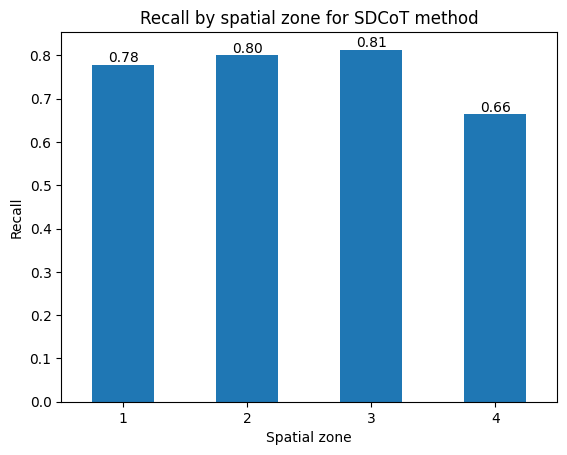

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,bookshelf,1.0,1.0,0.500000
2,bookshelf,2.0,2.0,0.500000
3,bookshelf,5.0,19.0,0.791667
4,bookshelf,12.0,35.0,0.744681


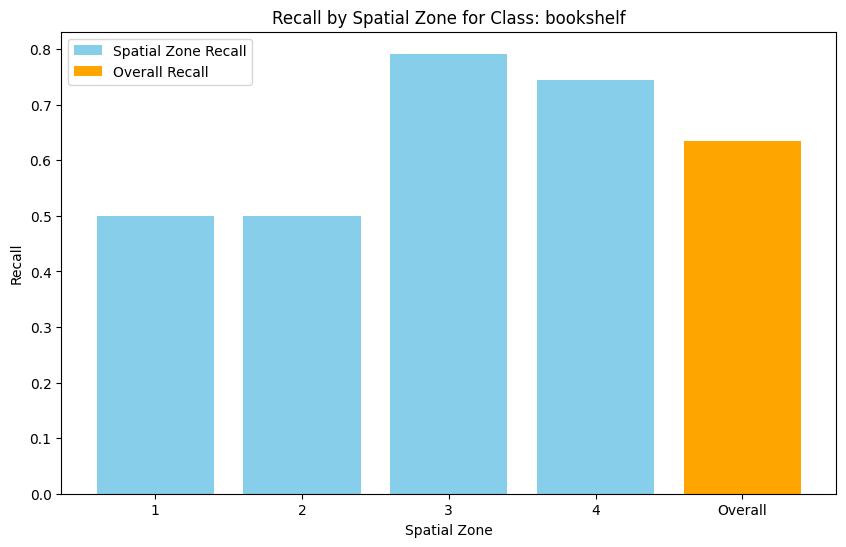

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,cabinet,1.0,0.0,0.000000
2,cabinet,1.0,12.0,0.923077
3,cabinet,70.0,88.0,0.556962
4,cabinet,79.0,121.0,0.605000


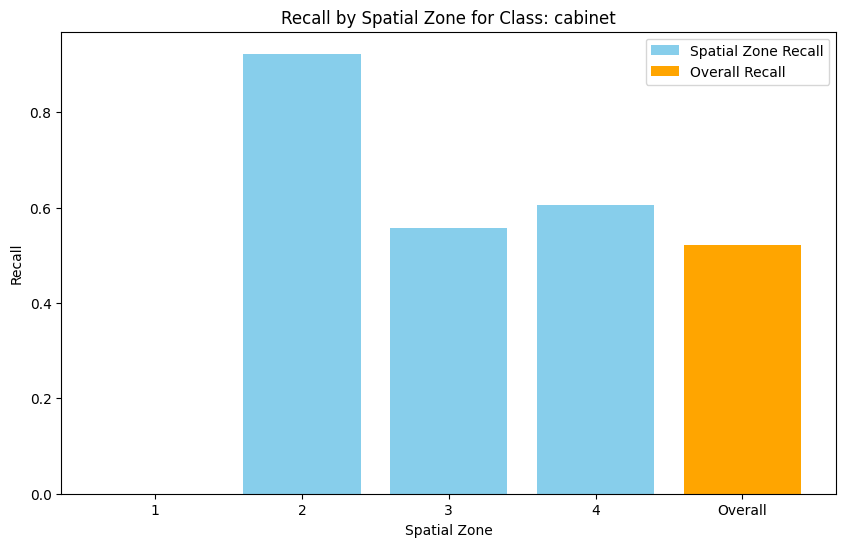

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,chair,1.0,17.0,0.944444
2,chair,17.0,241.0,0.934109
3,chair,62.0,768.0,0.925301
4,chair,37.0,225.0,0.858779


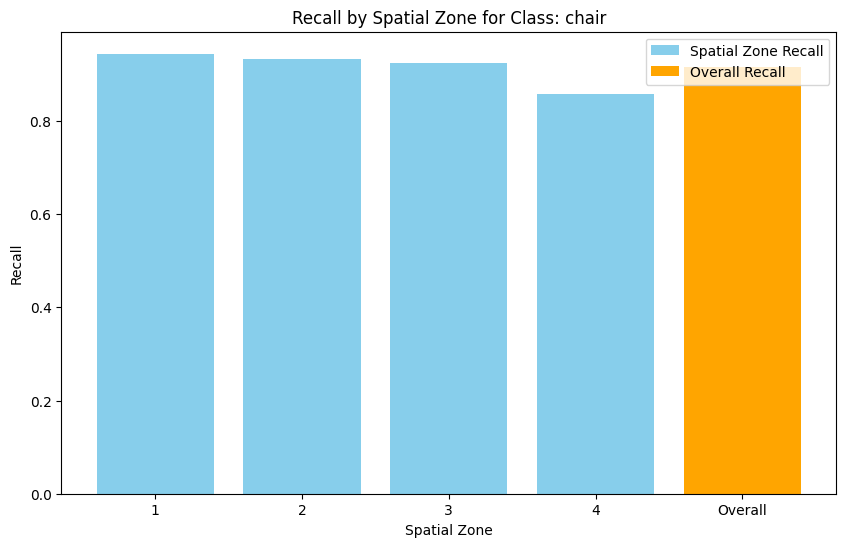

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,counter,0.0,1.0,1.000000
2,counter,0.0,14.0,1.000000
3,counter,7.0,13.0,0.650000
4,counter,5.0,12.0,0.705882


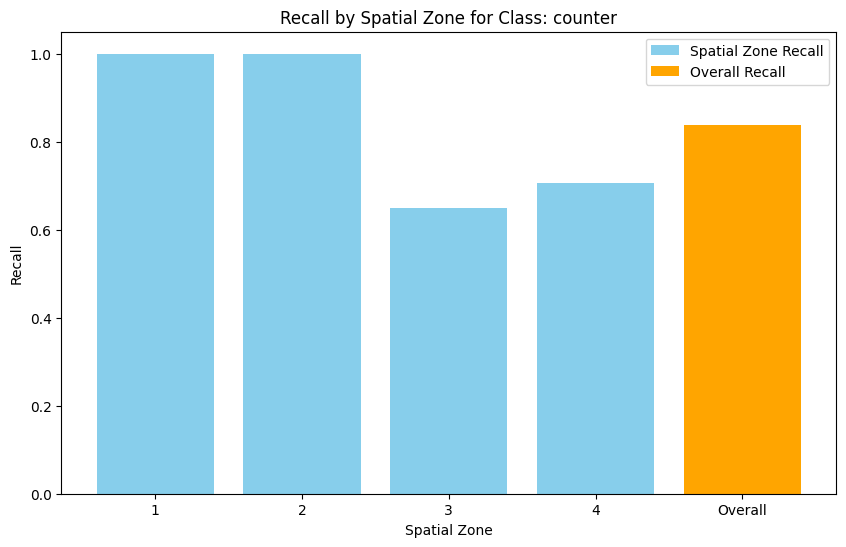

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,door,6.0,9.0,0.600000
2,door,20.0,58.0,0.743590
3,door,36.0,61.0,0.628866
4,door,92.0,185.0,0.667870


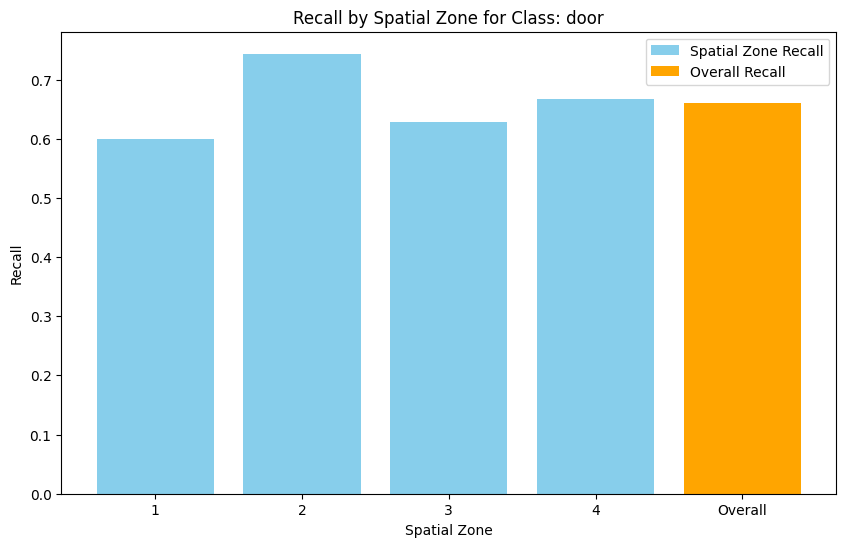

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,showercurtain,0.0,1.0,1.000000
2,showercurtain,2.0,3.0,0.600000
3,showercurtain,4.0,9.0,0.692308
4,showercurtain,1.0,8.0,0.888889


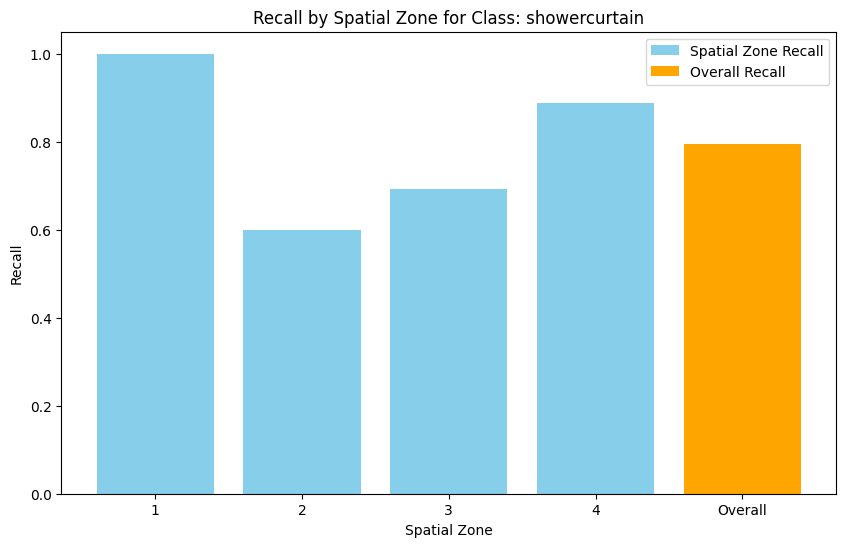

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,sink,0.0,1.0,1.000000
2,sink,4.0,6.0,0.600000
3,sink,21.0,31.0,0.596154
4,sink,13.0,22.0,0.628571


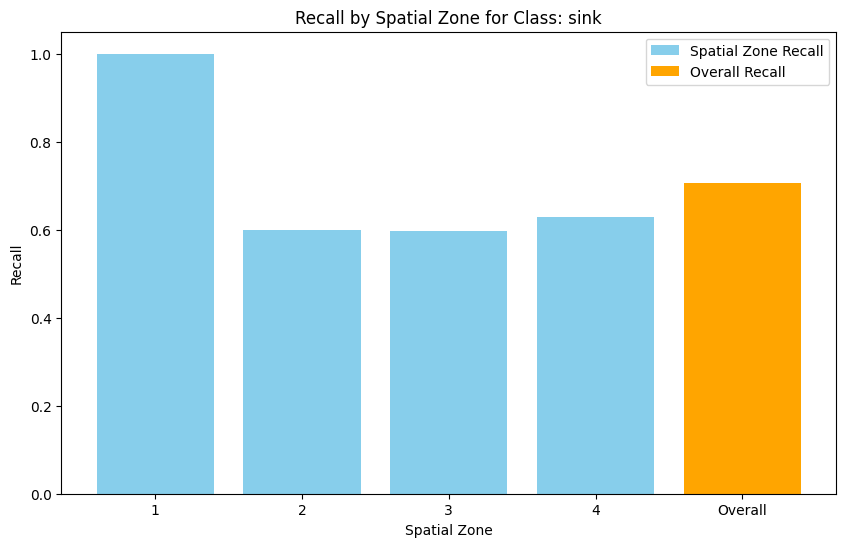

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,sofa,0.0,2.0,1.000000
2,sofa,0.0,6.0,1.000000
3,sofa,1.0,52.0,0.981132
4,sofa,1.0,35.0,0.972222


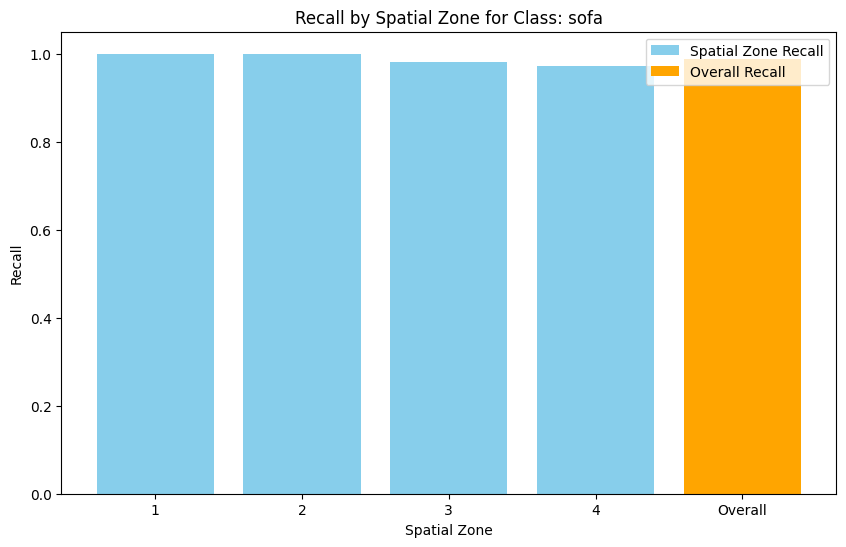

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,table,1.0,3.0,0.750000
2,table,16.0,45.0,0.737705
3,table,34.0,150.0,0.815217
4,table,15.0,86.0,0.851485


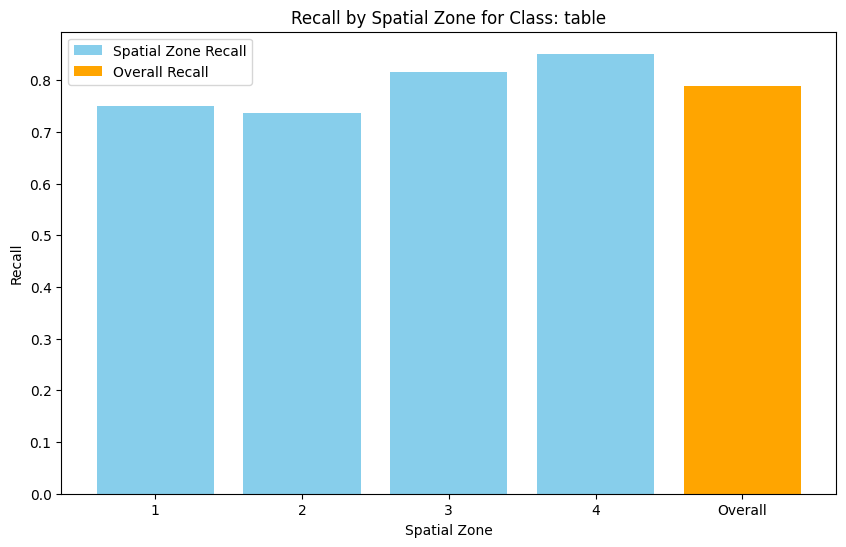

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,bed,0.0,18.0,1.000000
3,bed,3.0,48.0,0.941176
4,bed,5.0,7.0,0.583333


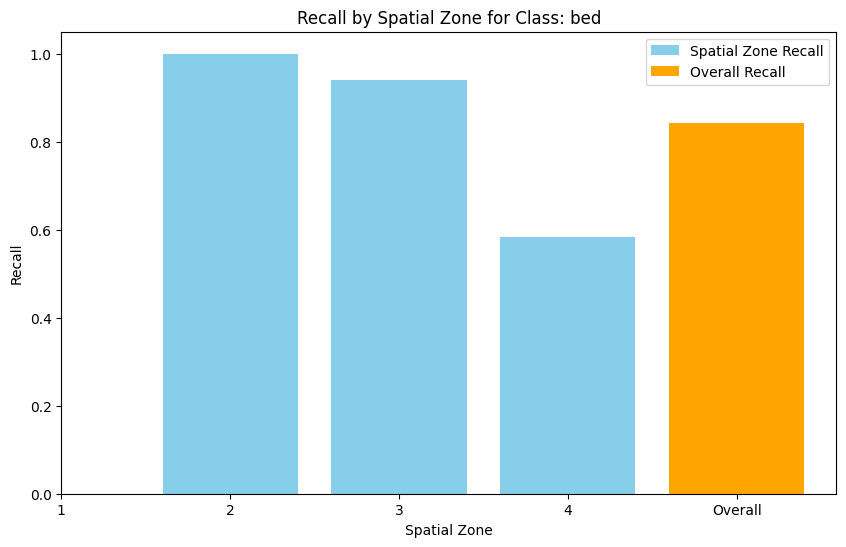

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,desk,2.0,2.0,0.500000
3,desk,8.0,83.0,0.912088
4,desk,5.0,27.0,0.843750


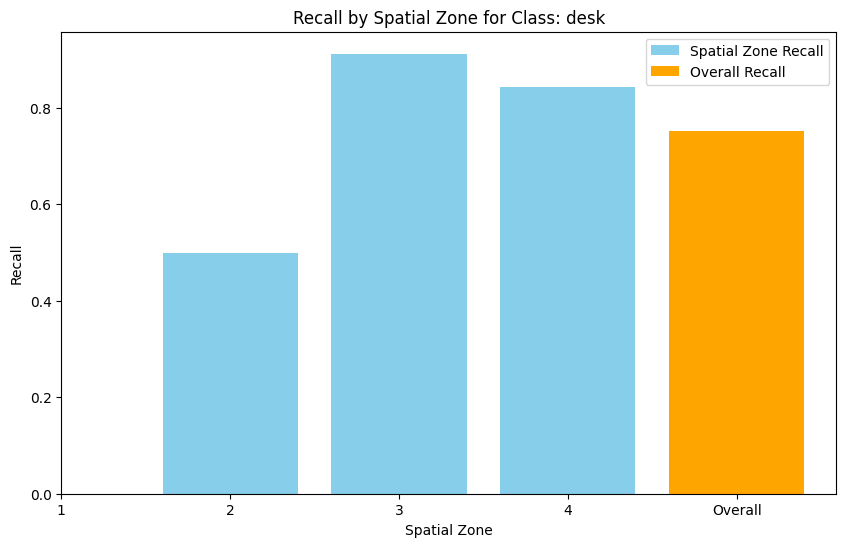

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,otherfurniture,13.0,12.0,0.480000
3,otherfurniture,48.0,116.0,0.707317
4,otherfurniture,109.0,232.0,0.680352


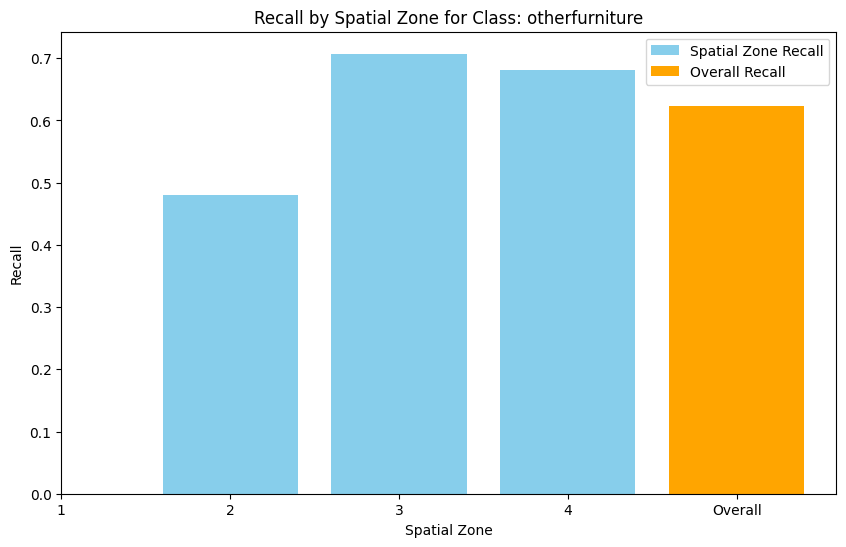

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,picture,27.0,1.0,0.035714
3,picture,31.0,3.0,0.088235
4,picture,122.0,38.0,0.237500


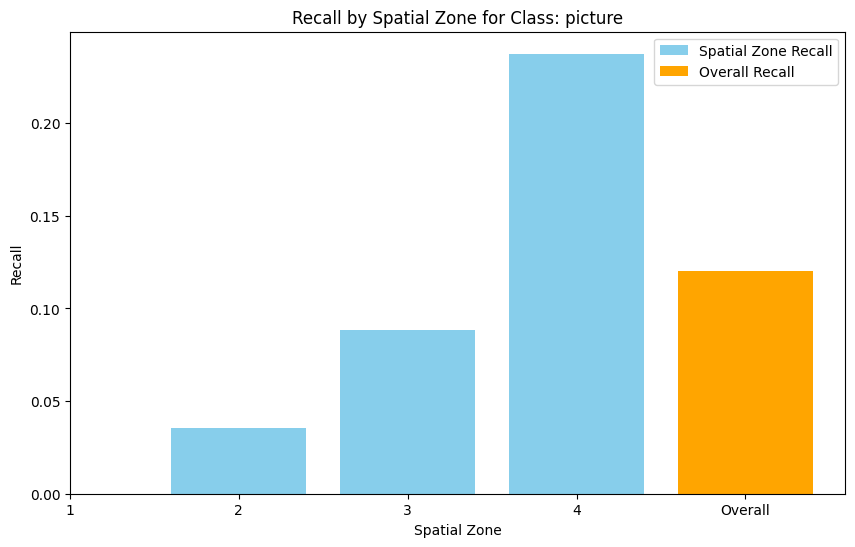

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,refrigerator,0.0,5.0,1.000000
3,refrigerator,3.0,31.0,0.911765
4,refrigerator,7.0,11.0,0.611111


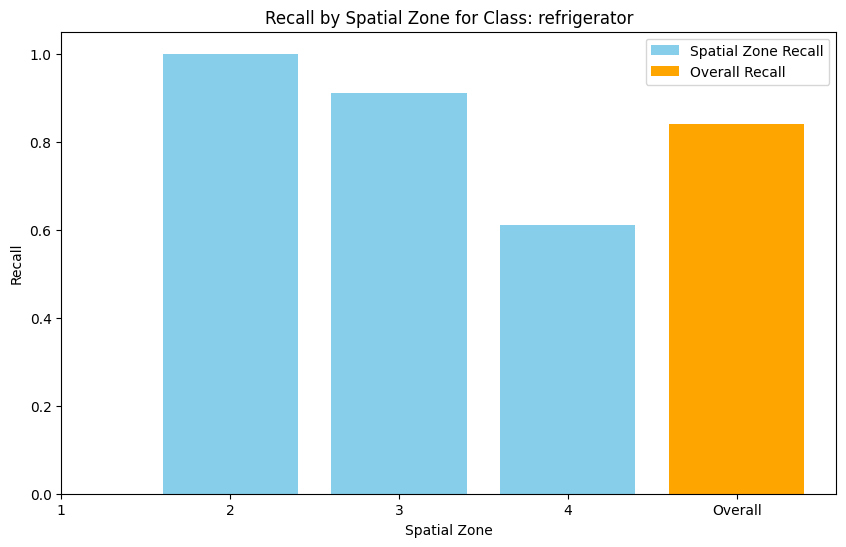

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,toilet,0.0,1.0,1.0
3,toilet,0.0,42.0,1.0
4,toilet,0.0,15.0,1.0


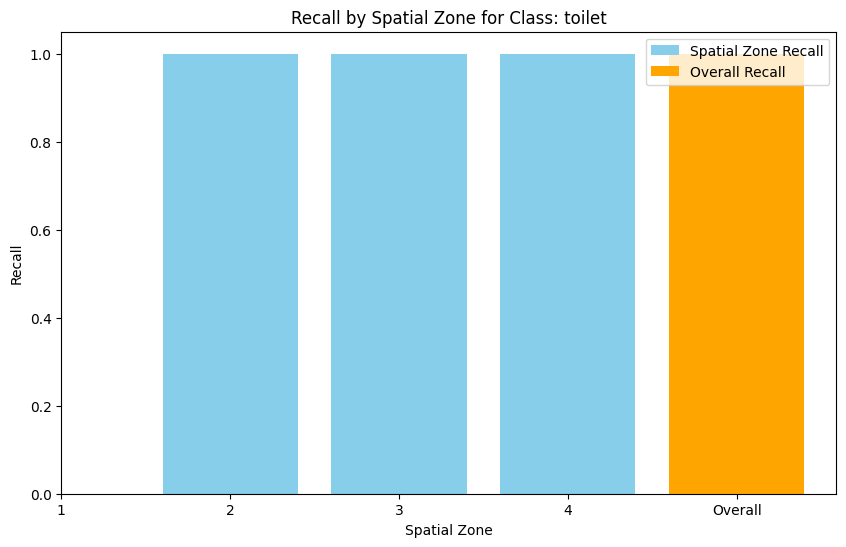

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,window,3.0,3.0,0.500000
3,window,19.0,18.0,0.486486
4,window,113.0,126.0,0.527197


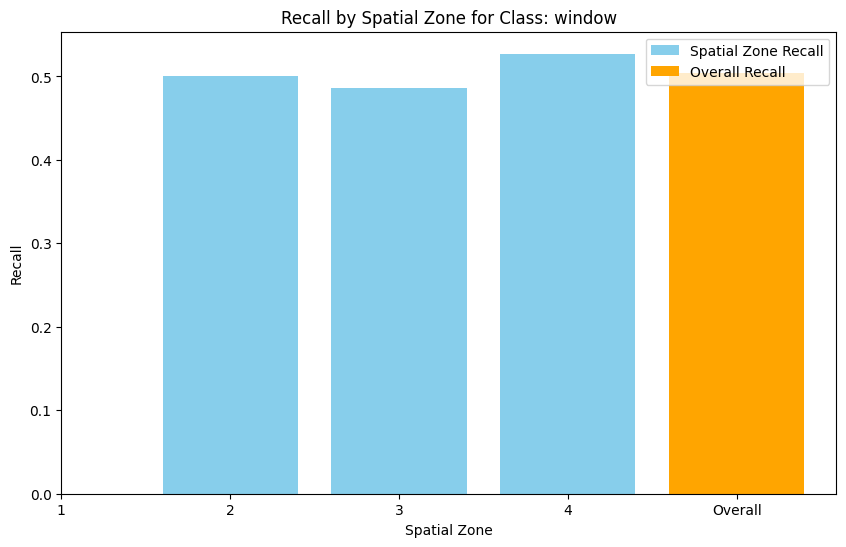

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
3,bathtub,1.0,5.0,0.833333
4,bathtub,1.0,24.0,0.960000


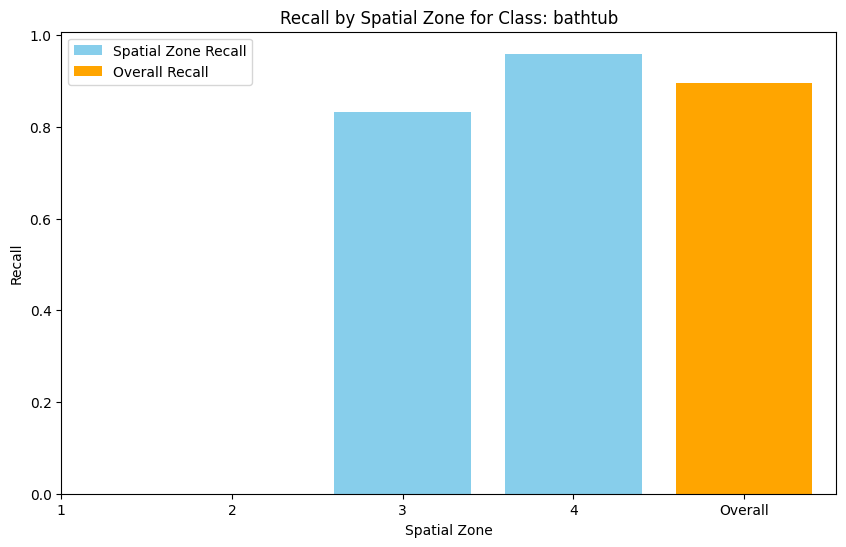

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
3,curtain,2.0,9.0,0.818182
4,curtain,16.0,40.0,0.714286


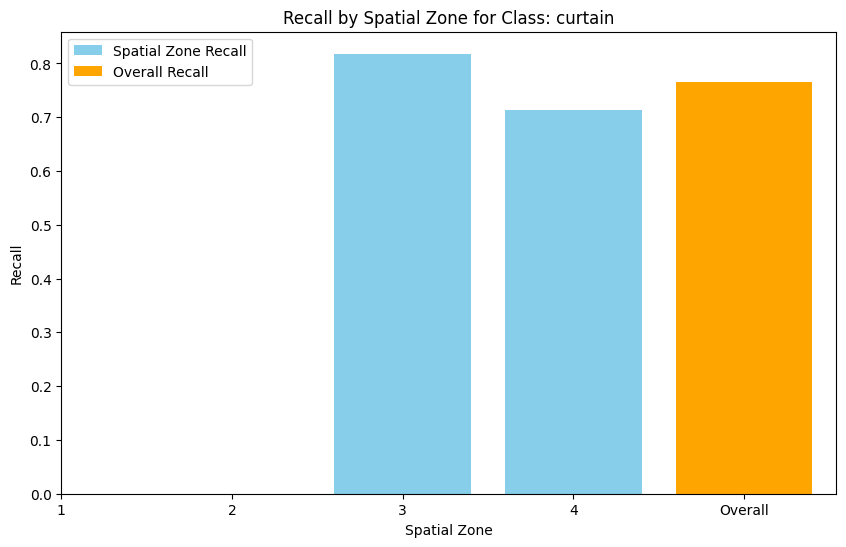

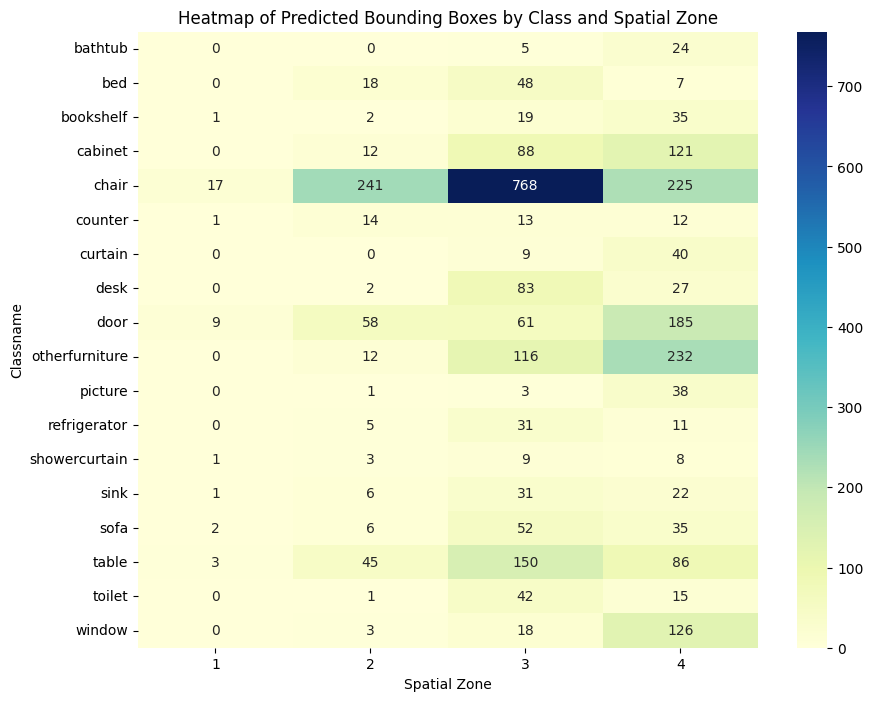

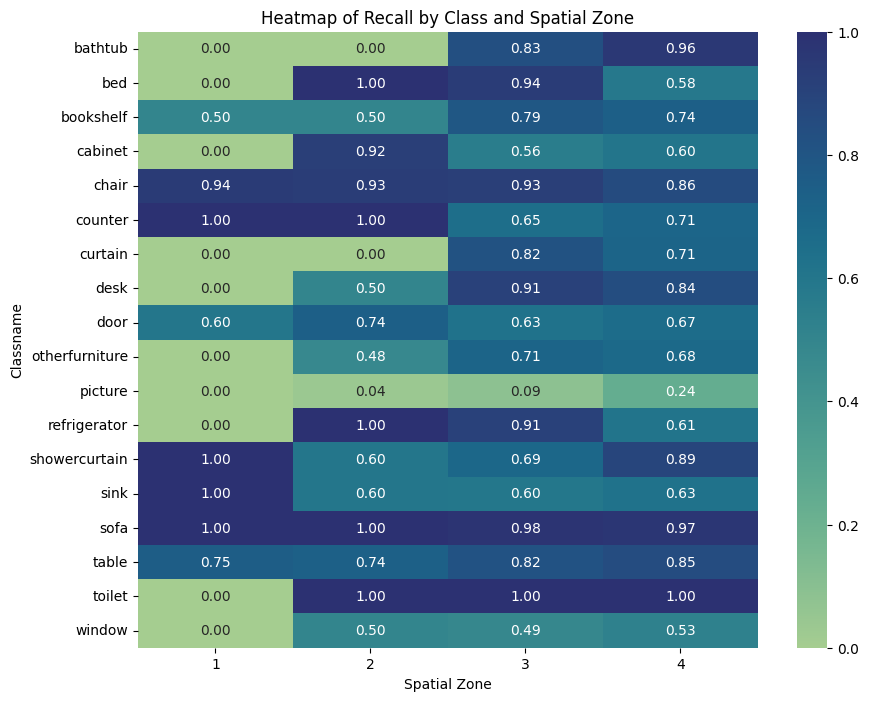

In [16]:
analyze_spatial_bias_df("/home/peisheng/SDCoT/ground_truth_object_results/gt_df_results_18classes_SDCoT_spatialzones.csv")

We can see that the recall values drop significantly when the GT bounding boxes are near the edge of the scene, at Zone 4, whereas the recall values remain around the same for the rest of the zones.

Classes with relatively lower recall values overall (<0.6): 
* Cabinet
* Picture
* Window

Zones + Classes with relatively lower recall values overall (<0.6):
* Bookshelf: Zones 1 and 2
* Cabinet: Zone 3
* Sink: Zone 3
* Bed: Zone 4
* Otherfurniture: Zone 2
* Desk: Zone 2
* Picture: All zones
* Window: All zones

# Count of True, False, Recall values in the has_pred_bbox column across all classes for the Base training method:

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 3458


has_pred_bbox,False,True,recall
spatial_zone,,,
1,5,40,0.888889
2,95,441,0.822761
3,277,1624,0.854287
4,529,1353,0.718916


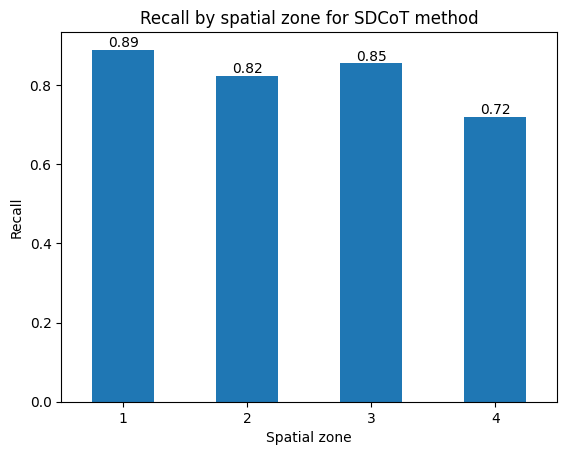

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,bookshelf,1.0,1.0,0.500000
2,bookshelf,2.0,2.0,0.500000
3,bookshelf,1.0,23.0,0.958333
4,bookshelf,6.0,41.0,0.872340


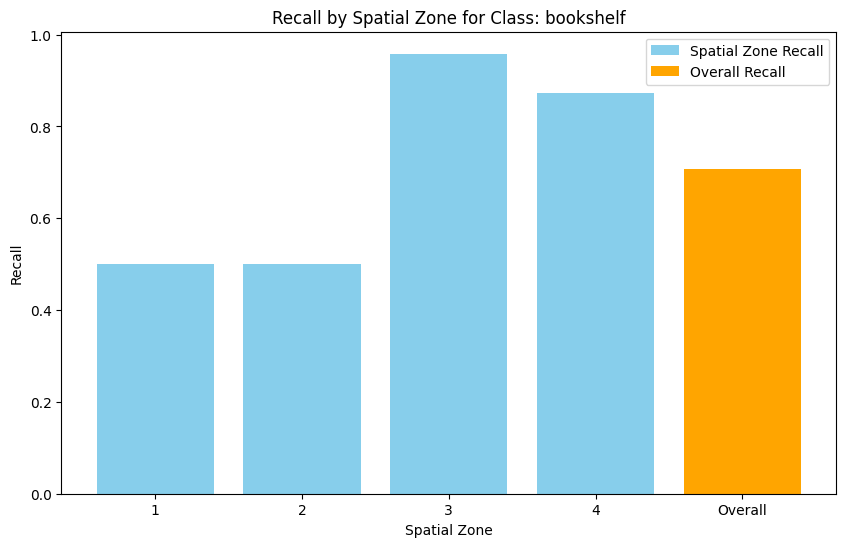

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,cabinet,0.0,1.0,1.000000
2,cabinet,2.0,11.0,0.846154
3,cabinet,43.0,115.0,0.727848
4,cabinet,48.0,152.0,0.760000


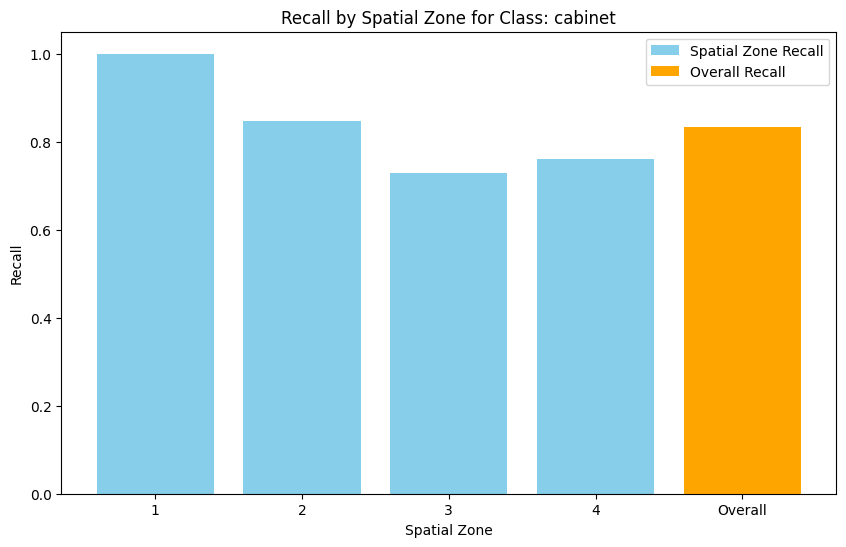

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,chair,1.0,17.0,0.944444
2,chair,16.0,242.0,0.937984
3,chair,72.0,758.0,0.913253
4,chair,35.0,227.0,0.866412


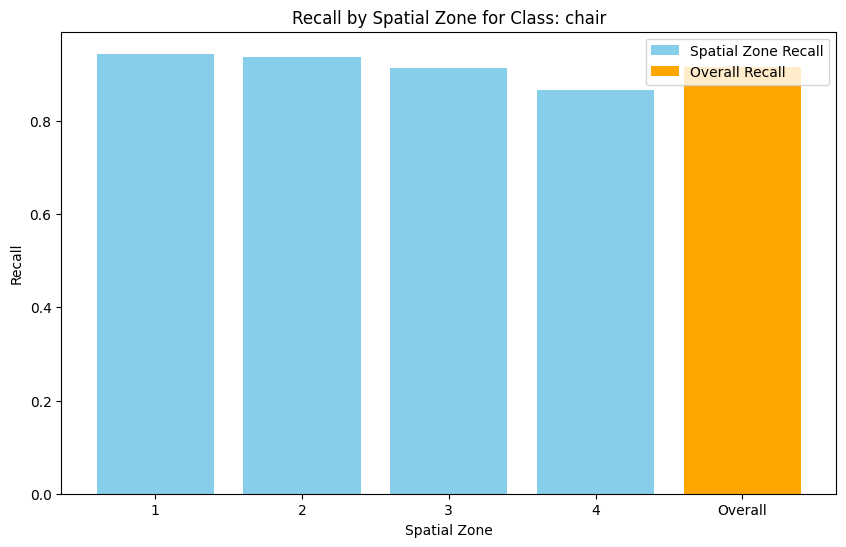

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,counter,0.0,1.0,1.000000
2,counter,1.0,13.0,0.928571
3,counter,5.0,15.0,0.750000
4,counter,4.0,13.0,0.764706


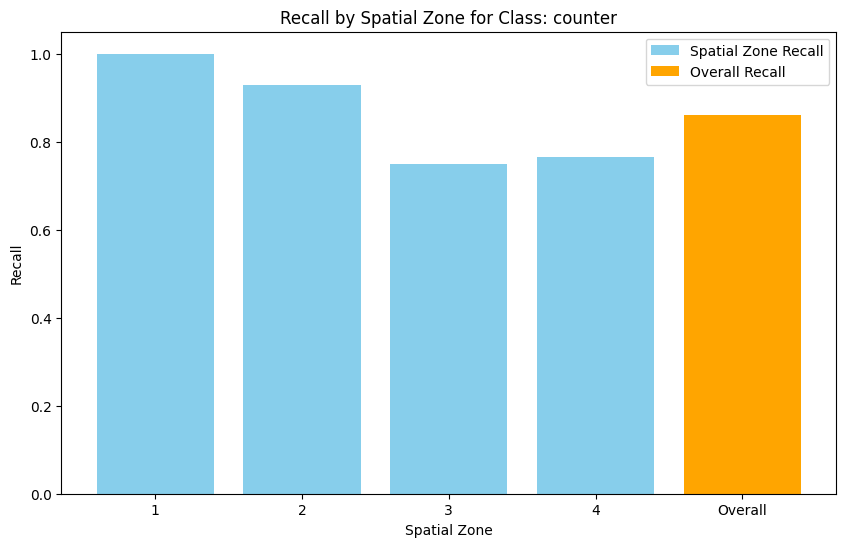

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,door,1.0,14.0,0.933333
2,door,13.0,65.0,0.833333
3,door,23.0,74.0,0.762887
4,door,54.0,223.0,0.805054


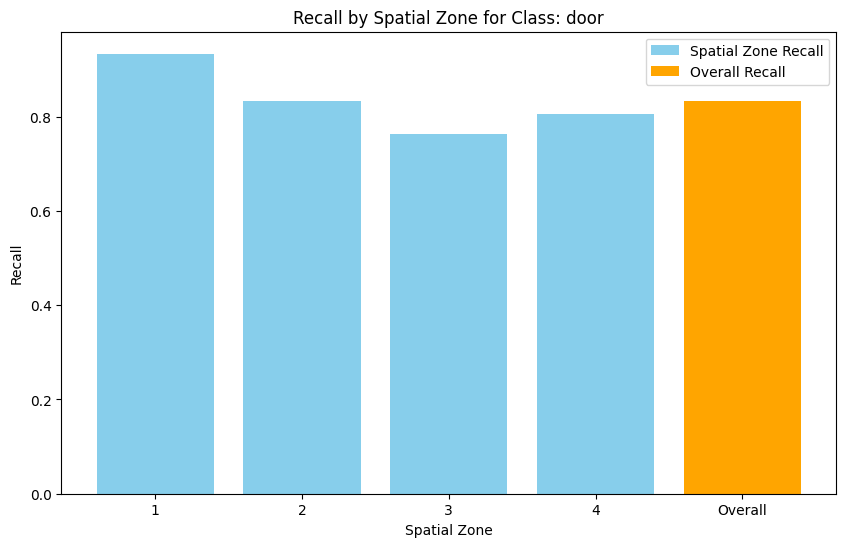

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,showercurtain,0.0,1.0,1.000000
2,showercurtain,0.0,5.0,1.000000
3,showercurtain,0.0,13.0,1.000000
4,showercurtain,1.0,8.0,0.888889


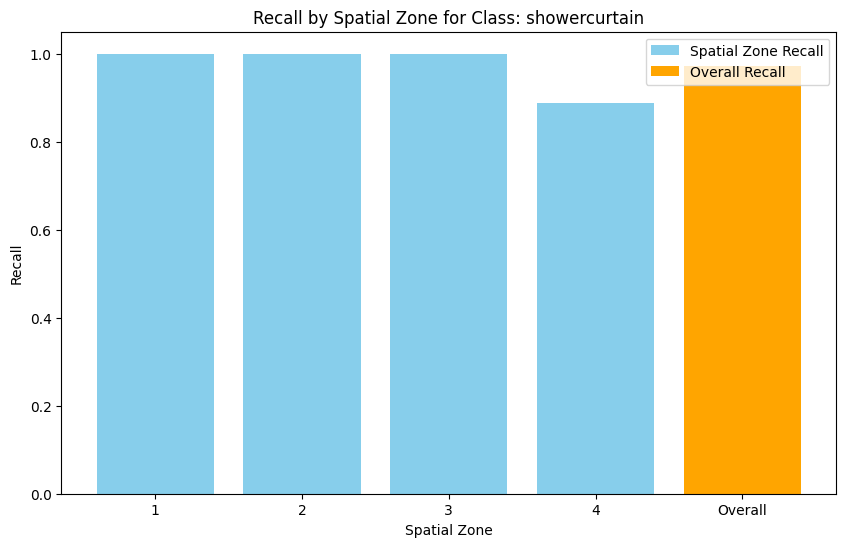

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,sink,0.0,1.0,1.000000
2,sink,3.0,7.0,0.700000
3,sink,15.0,37.0,0.711538
4,sink,11.0,24.0,0.685714


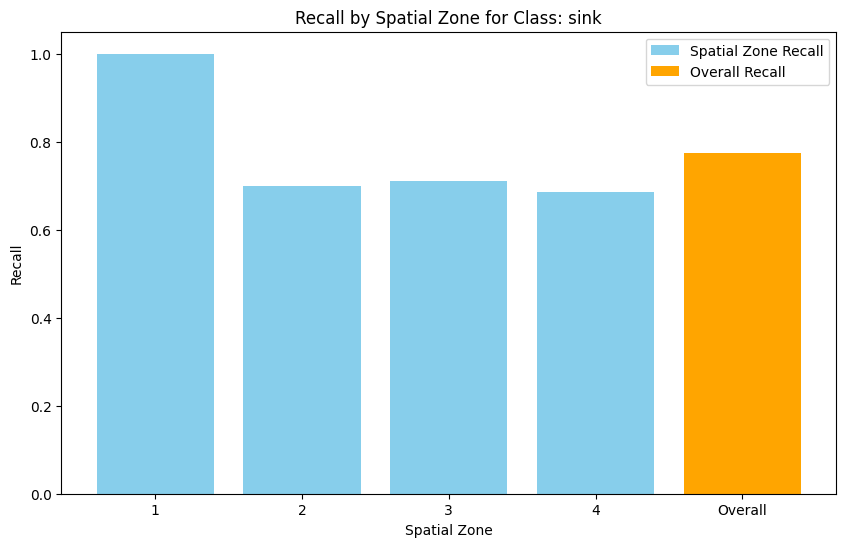

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,sofa,0.0,2.0,1.000000
2,sofa,0.0,6.0,1.000000
3,sofa,0.0,53.0,1.000000
4,sofa,4.0,32.0,0.888889


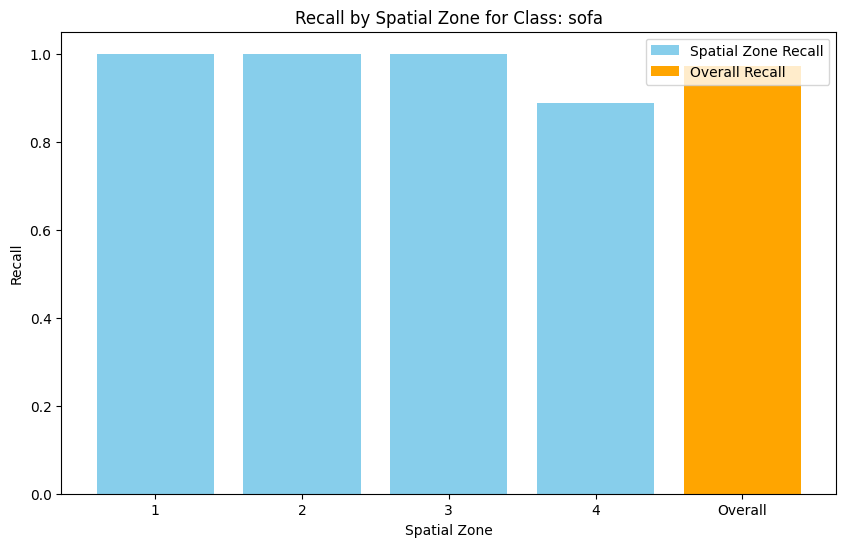

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
1,table,2.0,2.0,0.500000
2,table,16.0,45.0,0.737705
3,table,32.0,152.0,0.826087
4,table,15.0,86.0,0.851485


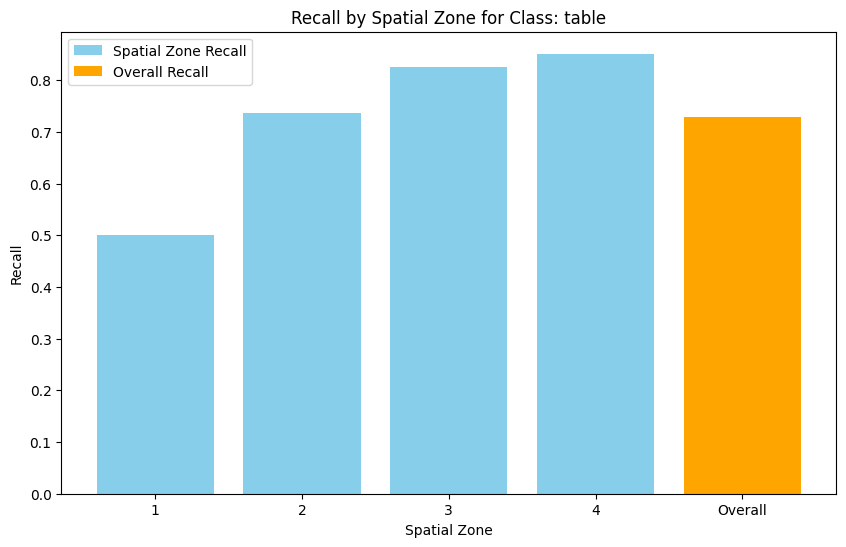

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,bed,0.0,18.0,1.00
3,bed,0.0,51.0,1.00
4,bed,3.0,9.0,0.75


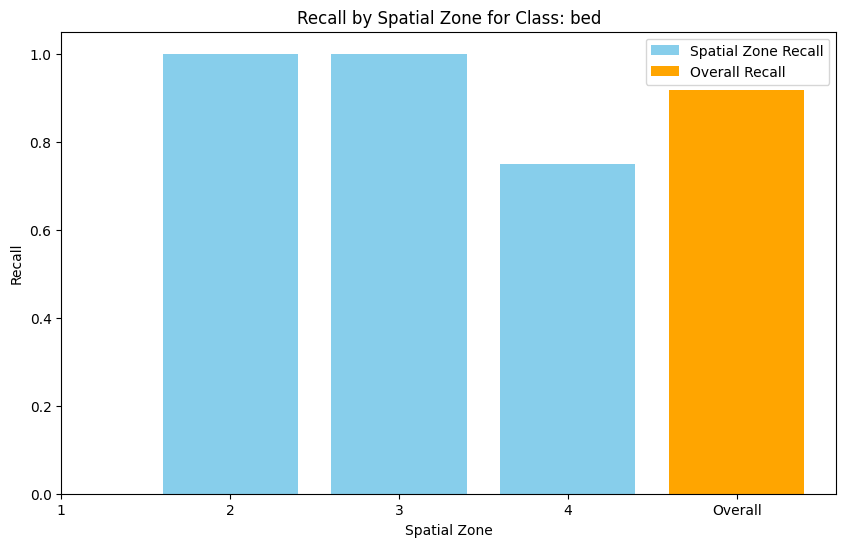

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,desk,1.0,3.0,0.750000
3,desk,2.0,89.0,0.978022
4,desk,2.0,30.0,0.937500


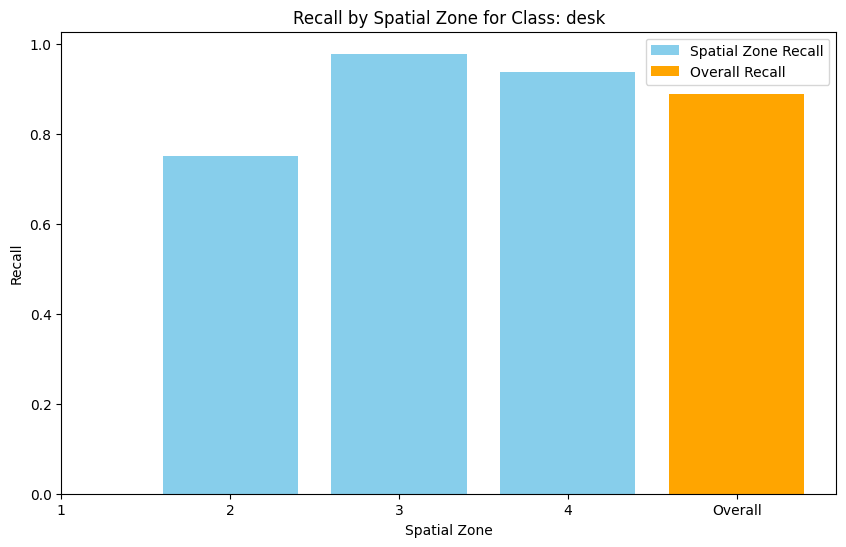

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,otherfurniture,12.0,13.0,0.520000
3,otherfurniture,41.0,123.0,0.750000
4,otherfurniture,101.0,240.0,0.703812


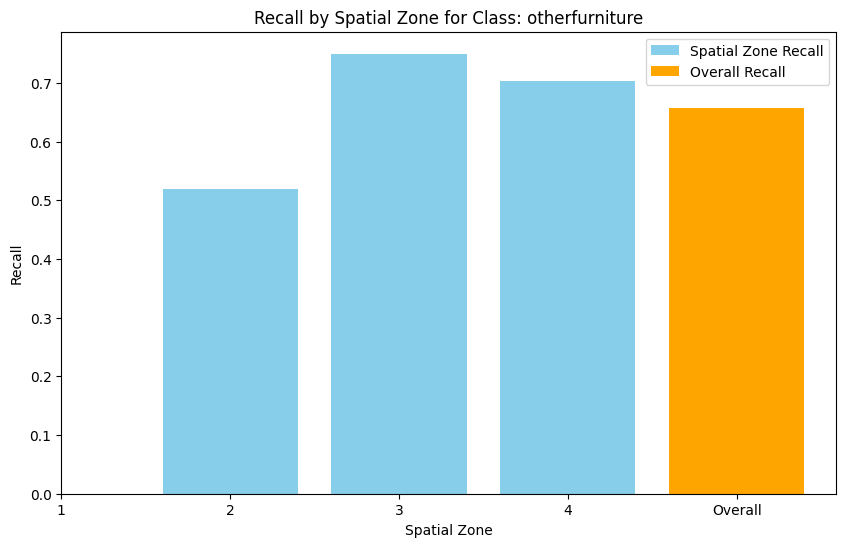

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,picture,28.0,0.0,0.000000
3,picture,31.0,3.0,0.088235
4,picture,125.0,35.0,0.218750


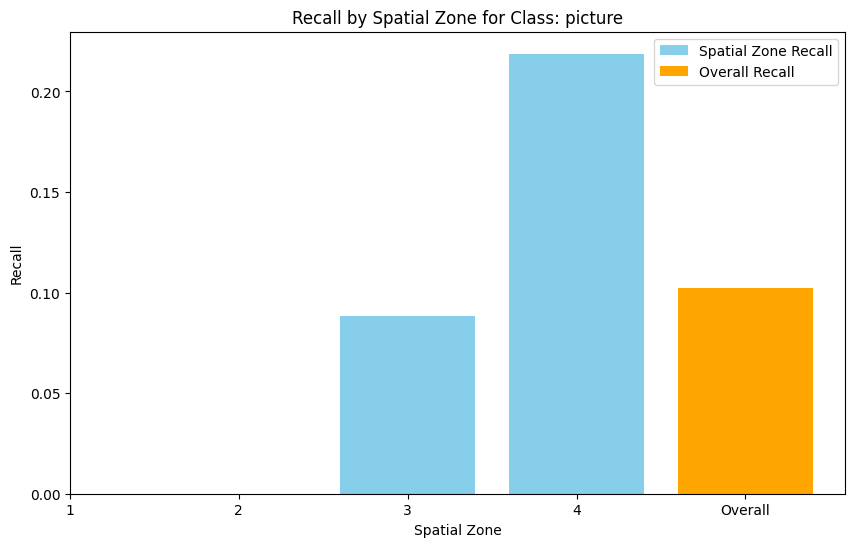

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,refrigerator,1.0,4.0,0.800000
3,refrigerator,2.0,32.0,0.941176
4,refrigerator,4.0,14.0,0.777778


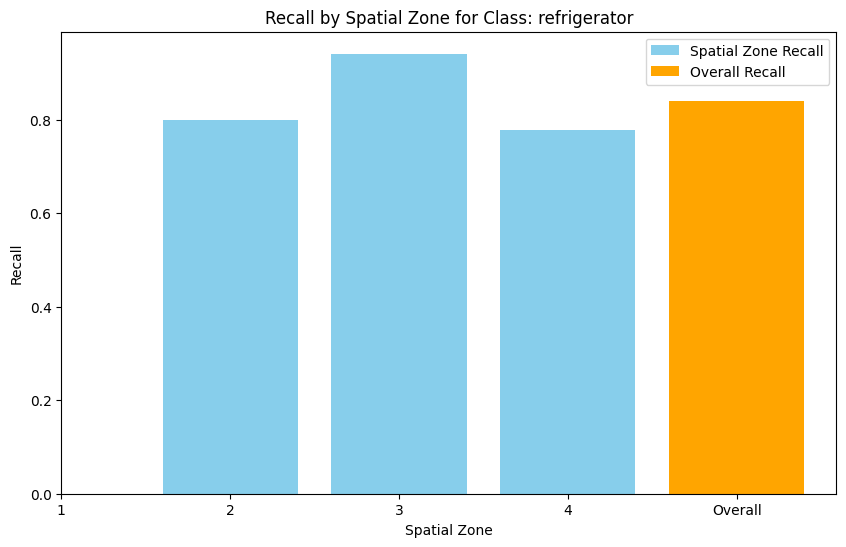

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,toilet,0.0,1.0,1.0
3,toilet,0.0,42.0,1.0
4,toilet,0.0,15.0,1.0


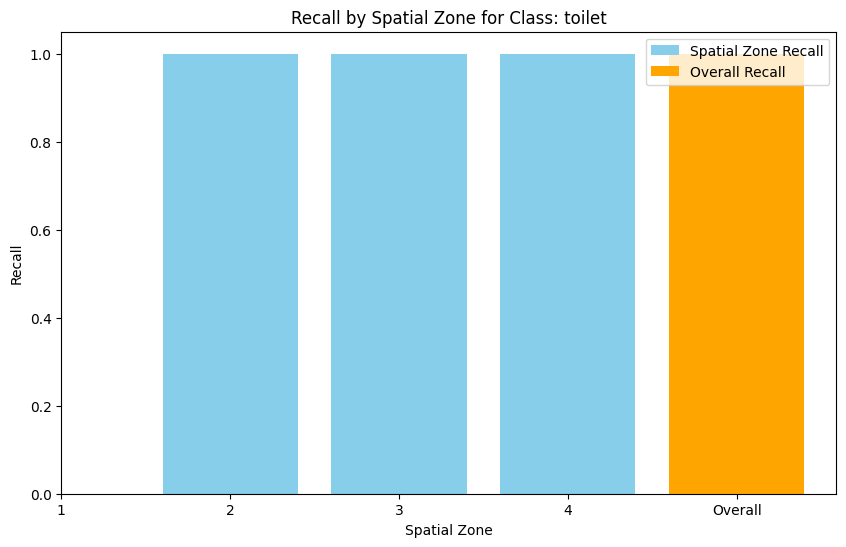

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
2,window,0.0,6.0,1.000000
3,window,9.0,28.0,0.756757
4,window,100.0,139.0,0.581590


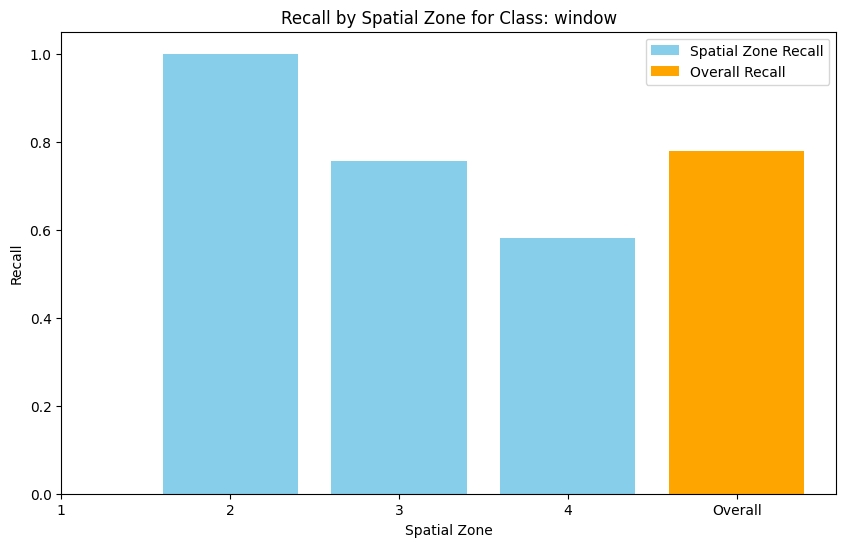

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
3,bathtub,0.0,6.0,1.00
4,bathtub,2.0,23.0,0.92


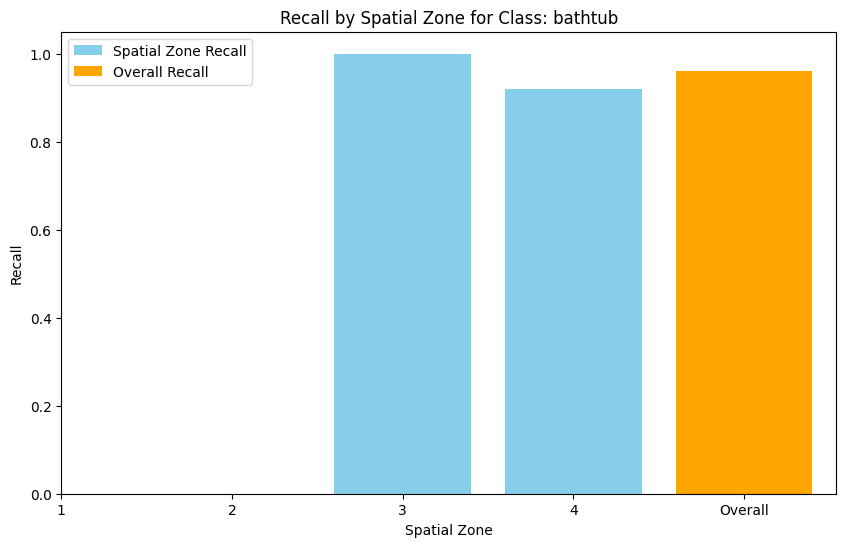

,has_pred_bbox,False,True,recall
spatial_zone,classname,,,
3,curtain,1.0,10.0,0.909091
4,curtain,14.0,42.0,0.750000


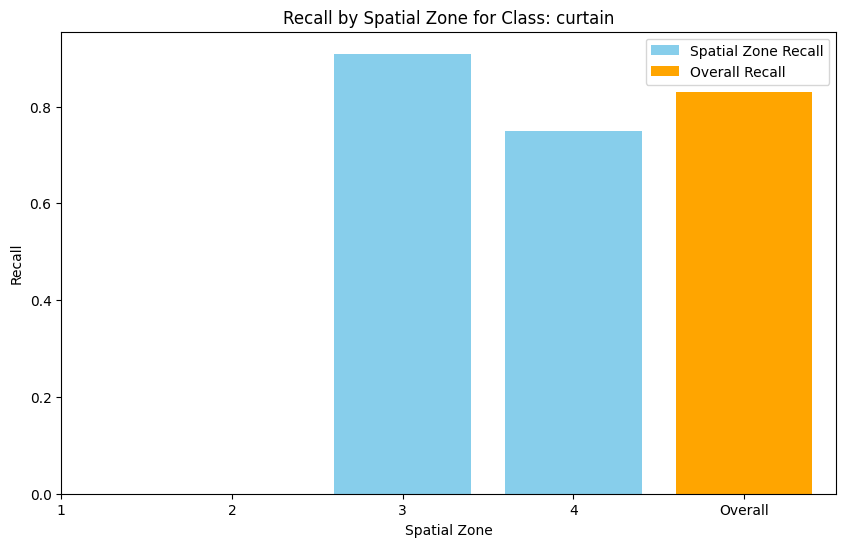

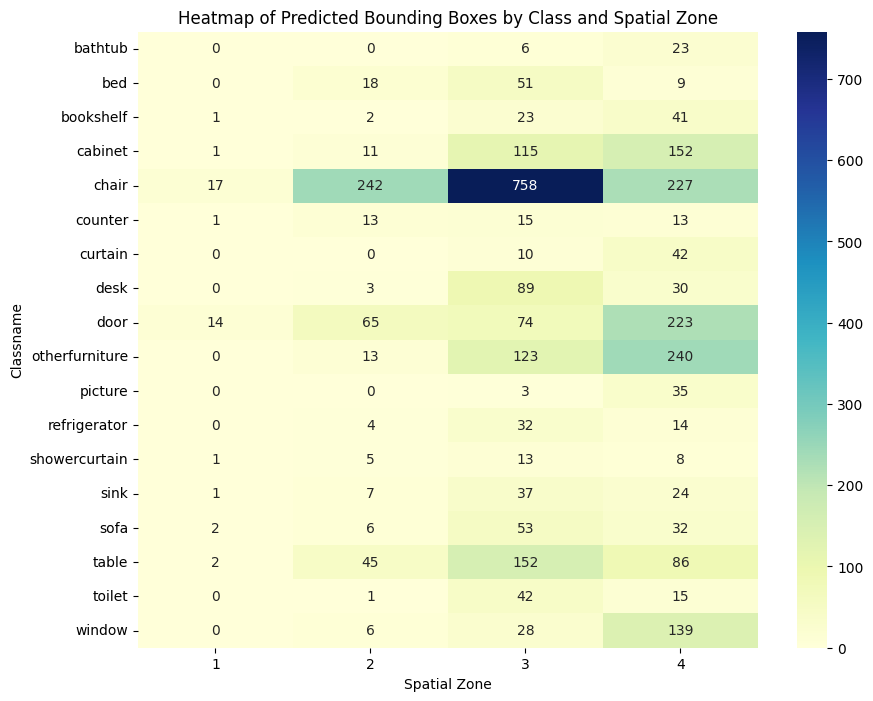

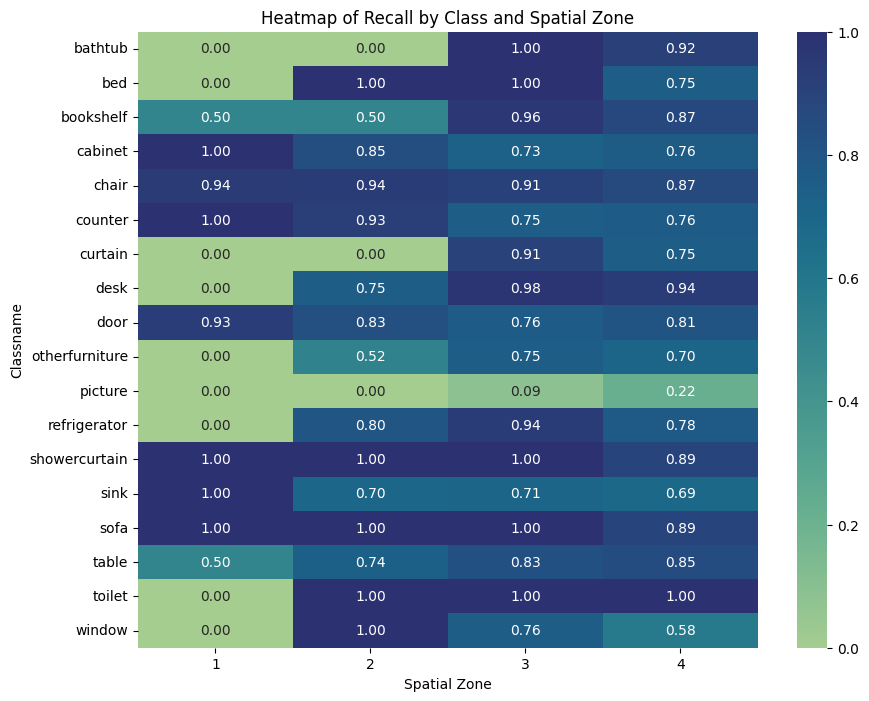

In [17]:
analyze_spatial_bias_df("/home/peisheng/SDCoT/ground_truth_object_results/gt_df_results_18classes_basetrain_spatialzones.csv")

Similarly, we can see that the recall values drop significantly when the GT bounding boxes are near the edge of the scene, at Zone 4, whereas the recall values remain around the same for the rest of the zones. Also, we see that GT bounding boxes in the most central zone, Zone 1, yielded the best results in terms of having a corresponding predicted bounding boxes.

Classes with relatively lower recall values overall (<0.6): 
* Picture

Zones + Classes with relatively lower recall values overall (<0.6):
* Bookshelf: Zones 1 and 2
* Table: Zone 1
* Otherfurniture: Zone 2
* Picture: All zones
* Window: Zone 4